# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir("/content/drive/MyDrive/Colab_Notebooks/mp4/assignment4")
import sys
sys.path.append(".")

Mounted at /content/drive/


In [3]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [4]:
from gan.train import train
from gan.utils import sample_noise, show_images, deprocess_img, preprocess_img
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



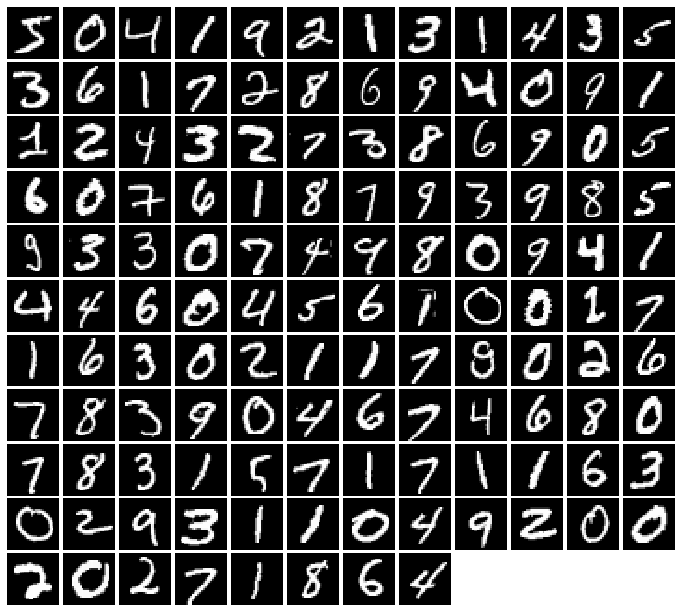

In [6]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)


imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()
show_images(imgs)

# Discriminator and Generator


In [7]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [8]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [20]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """
    
    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )
    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="gan_samples/mnist.jpg" width=500>

EPOCH:  1
Iter: 0, D: 1.424, G:0.7172


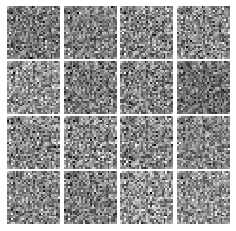


Iter: 250, D: 1.342, G:0.7755


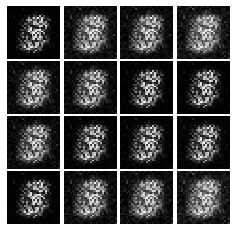


EPOCH:  2
Iter: 500, D: 0.8837, G:1.332


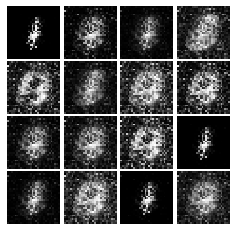


Iter: 750, D: 1.007, G:2.059


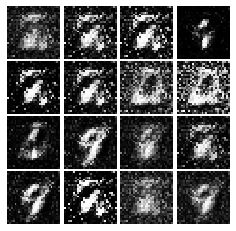


EPOCH:  3
Iter: 1000, D: 1.072, G:0.8254


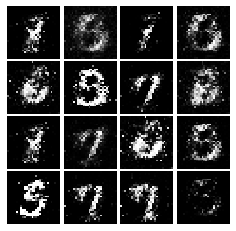


Iter: 1250, D: 1.307, G:0.3625


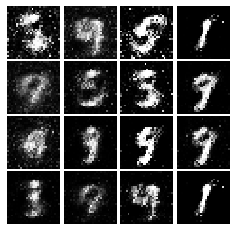


EPOCH:  4
Iter: 1500, D: 1.045, G:1.215


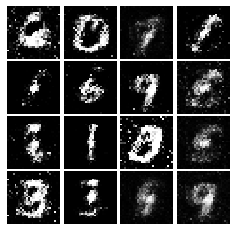


Iter: 1750, D: 1.163, G:1.187


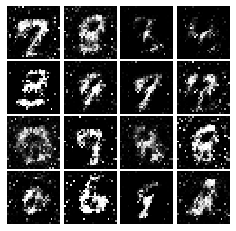


EPOCH:  5
Iter: 2000, D: 1.162, G:1.028


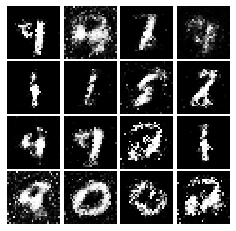


Iter: 2250, D: 1.221, G:0.8792


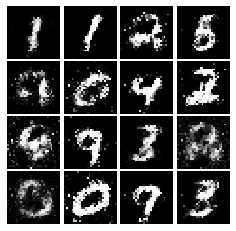


EPOCH:  6
Iter: 2500, D: 1.312, G:0.9058


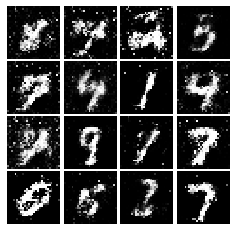


Iter: 2750, D: 1.378, G:0.8805


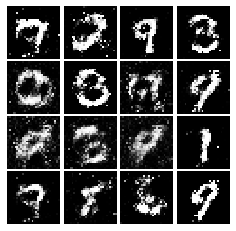


EPOCH:  7
Iter: 3000, D: 1.334, G:0.9243


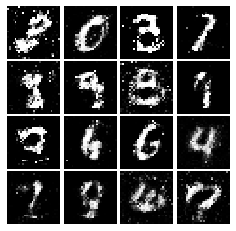


Iter: 3250, D: 1.242, G:0.9609


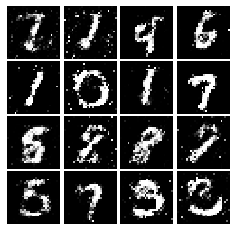


EPOCH:  8
Iter: 3500, D: 1.25, G:0.8618


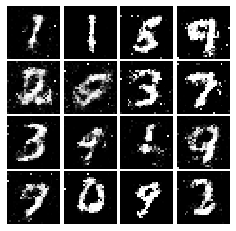


EPOCH:  9
Iter: 3750, D: 1.358, G:0.8752


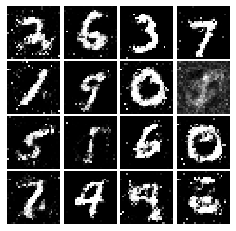


Iter: 4000, D: 1.262, G:0.8923


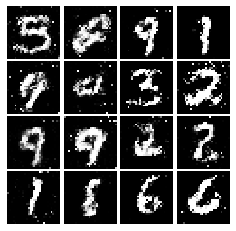


EPOCH:  10
Iter: 4250, D: 1.252, G:0.8274


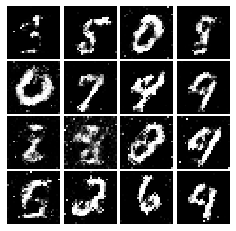


Iter: 4500, D: 1.324, G:0.8689


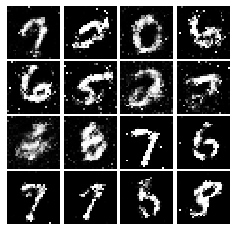


EPOCH:  11
Iter: 4750, D: 1.396, G:0.7593


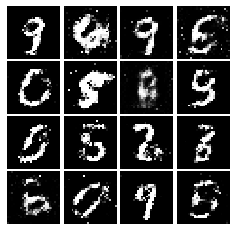


Iter: 5000, D: 1.299, G:0.8326


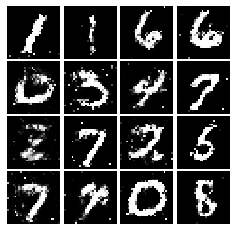


EPOCH:  12
Iter: 5250, D: 1.313, G:0.7928


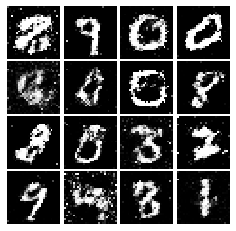


Iter: 5500, D: 1.235, G:0.8116


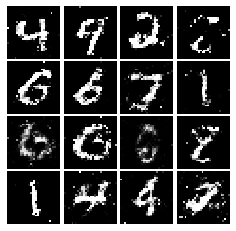


EPOCH:  13
Iter: 5750, D: 1.298, G:0.8475


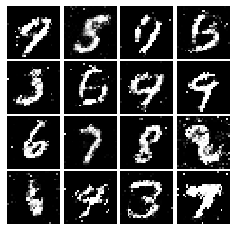


Iter: 6000, D: 1.233, G:0.796


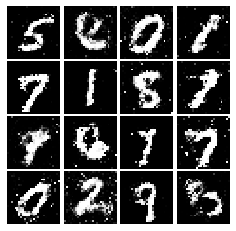


EPOCH:  14
Iter: 6250, D: 1.323, G:0.8637


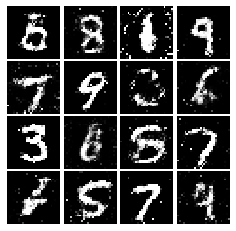


Iter: 6500, D: 1.336, G:0.8183


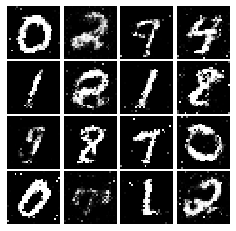


EPOCH:  15
Iter: 6750, D: 1.312, G:0.7766


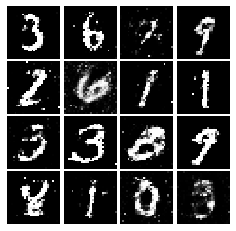


Iter: 7000, D: 1.318, G:0.8325


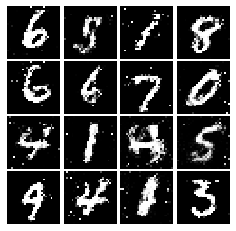


EPOCH:  16
Iter: 7250, D: 1.401, G:0.7602


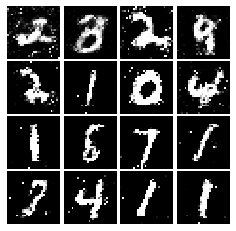


EPOCH:  17
Iter: 7500, D: 1.329, G:0.8572


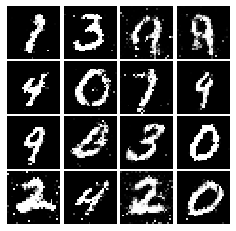


Iter: 7750, D: 1.376, G:0.7283


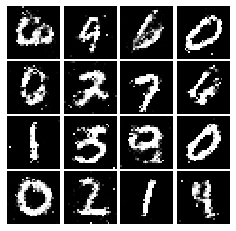


EPOCH:  18
Iter: 8000, D: 1.333, G:0.8624


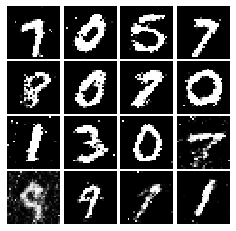


Iter: 8250, D: 1.395, G:0.7548


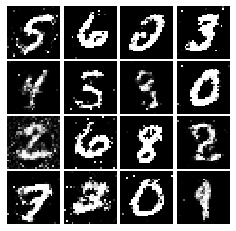


EPOCH:  19
Iter: 8500, D: 1.283, G:0.8298


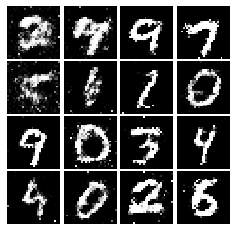


Iter: 8750, D: 1.251, G:0.8069


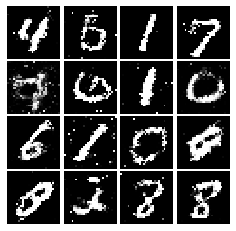


EPOCH:  20
Iter: 9000, D: 1.281, G:0.7741


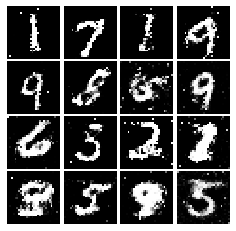


Iter: 9250, D: 1.27, G:0.8139


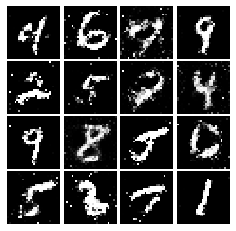


EPOCH:  21
Iter: 9500, D: 1.336, G:0.8622


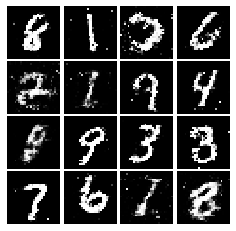


Iter: 9750, D: 1.288, G:0.84


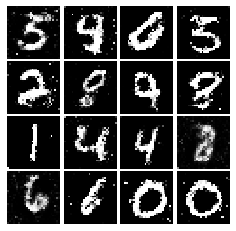


EPOCH:  22
Iter: 10000, D: 1.314, G:0.8577


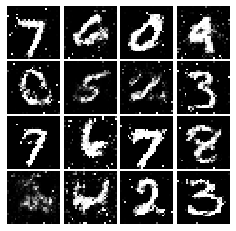


Iter: 10250, D: 1.248, G:0.8608


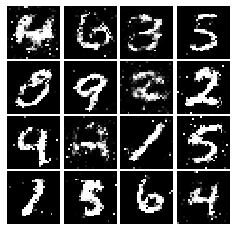


EPOCH:  23
Iter: 10500, D: 1.29, G:0.9279


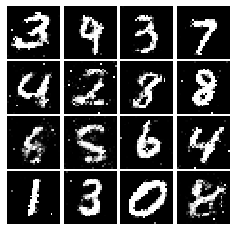


Iter: 10750, D: 1.209, G:0.858


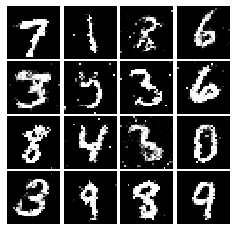


EPOCH:  24
Iter: 11000, D: 1.332, G:0.8419


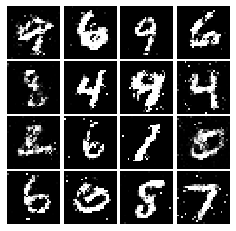


EPOCH:  25
Iter: 11250, D: 1.294, G:0.758


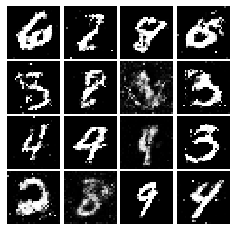


Iter: 11500, D: 1.262, G:0.8273


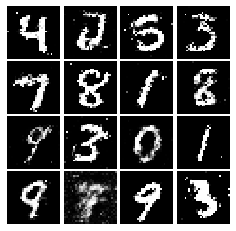


EPOCH:  26
Iter: 11750, D: 1.265, G:0.8812


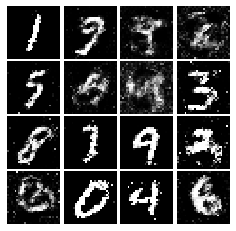


Iter: 12000, D: 1.296, G:0.851


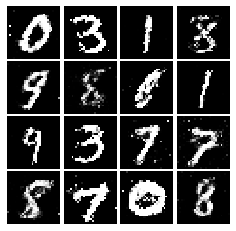


EPOCH:  27
Iter: 12250, D: 1.286, G:0.8697


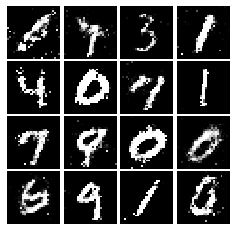


Iter: 12500, D: 1.327, G:0.8595


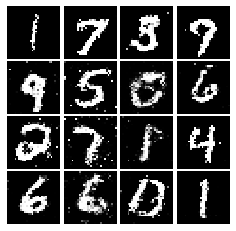


EPOCH:  28
Iter: 12750, D: 1.234, G:0.8365


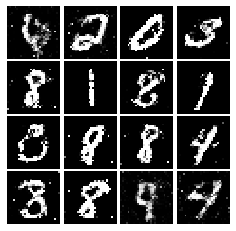


Iter: 13000, D: 1.264, G:0.9685


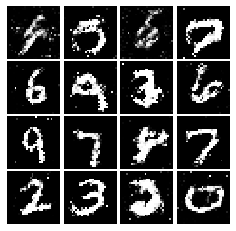


EPOCH:  29
Iter: 13250, D: 1.321, G:0.9063


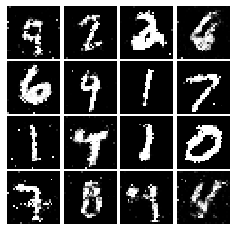


Iter: 13500, D: 1.325, G:0.8943


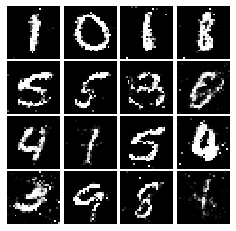


EPOCH:  30
Iter: 13750, D: 1.303, G:0.9179


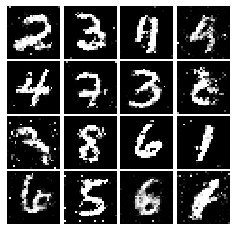


Iter: 14000, D: 1.277, G:0.7836


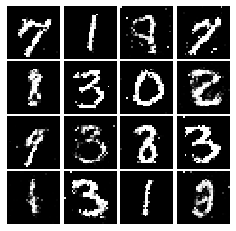


EPOCH:  31
Iter: 14250, D: 1.317, G:0.7991


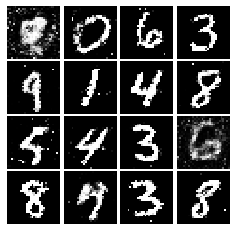


Iter: 14500, D: 1.312, G:0.878


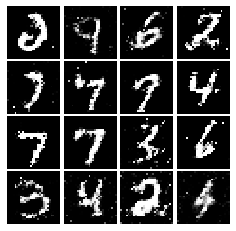


EPOCH:  32


KeyboardInterrupt: ignored

In [44]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=50, device=device)

In [45]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1


TypeError: ignored